In [3]:
#The Reuters dataset

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[10]

3

In [11]:
#Preparing the data

import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [14]:
#Building our network

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#Validating our approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 78ms/step - loss: 2.6948 - accuracy: 0.5272 - val_loss: 1.8219 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.4811 - accuracy: 0.6989 - val_loss: 1.3510 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0899 - accuracy: 0.7628 - val_loss: 1.1676 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8496 - accuracy: 0.8203 - val_loss: 1.0894 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6742 - accuracy: 0.8584 - val_loss: 0.9760 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5367 - accuracy: 0.8870 - val_loss: 0.9563 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4316 - accuracy: 0.9128 - val_loss: 0.9278 - val_accuracy: 0.8070
Epoch 8/20
16

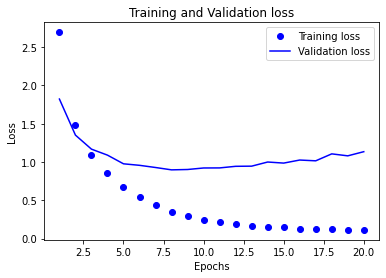

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

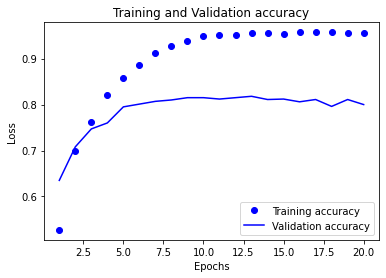

In [20]:
plt.clf()  # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 60ms/step - loss: 2.7029 - accuracy: 0.5274 - val_loss: 1.7504 - val_accuracy: 0.6670
Epoch 2/8
16/16 [==============================] - 1s 50ms/step - loss: 1.4325 - accuracy: 0.7041 - val_loss: 1.3257 - val_accuracy: 0.7250
Epoch 3/8
16/16 [==============================] - 1s 49ms/step - loss: 1.0601 - accuracy: 0.7761 - val_loss: 1.1442 - val_accuracy: 0.7540
Epoch 4/8
16/16 [==============================] - 1s 51ms/step - loss: 0.8341 - accuracy: 0.8250 - val_loss: 1.0639 - val_accuracy: 0.7760
Epoch 5/8
16/16 [==============================] - 1s 51ms/step - loss: 0.6705 - accuracy: 0.8618 - val_loss: 0.9732 - val_accuracy: 0.8010
Epoch 6/8
16/16 [==============================] - 1s 53ms/step - loss: 0.5353 - accuracy: 0.8906 - val_loss: 0.9257 - val_accuracy: 0.8040
Epoch 7/8
16/16 [==============================] - 1s 52ms/step - loss: 0.4293 - accuracy: 0.9112 - val_loss: 0.9168 - val_accuracy: 0.8020
Epoch 8/8
71/71 [===

In [22]:
results

[0.9823852181434631, 0.7889581322669983]

In [23]:
import copy   

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18744434550311664

In [24]:
#Generating predictions on new data
#We can verify that the predict method of our model instance returns a probability distribution over all 46 topics. Let's generate topic predictions for all of the test data:

predictions = model.predict(x_test)

In [25]:
#Each entry in predictions is a vector of length 46:

predictions[0].shape

(46,)

In [26]:
#The coefficients in this vector sum to 1:

np.sum(predictions[0])

0.9999999

In [27]:
#The largest entry is the predicted class, i.e. the class with the highest probability:

np.argmax(predictions[0])

3

In [28]:
#A different way to handle the labels and the loss

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [29]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
#On the importance of having sufficiently large intermediate layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 1.7601 - accuracy: 0.6383 - val_loss: 1.2264 - val_accuracy: 0.7340
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9604 - accuracy: 0.7912 - val_loss: 1.0238 - val_accuracy: 0.7560
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 0.6550 - accuracy: 0.8538 - val_loss: 0.9081 - val_accuracy: 0.8030
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 0.4588 - accuracy: 0.9023 - val_loss: 0.8748 - val_accuracy: 0.8240
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 0.3316 - accuracy: 0.9276 - val_loss: 0.8876 - val_accuracy: 0.8190
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.2539 - accuracy: 0.9442 - val_loss: 0.9778 - val_accuracy: 0.8100
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.2092 - accuracy: 0.9471 - val_loss: 0.9541 - val_accuracy: 0.8210
Epoch 8/20
63